# Sales Analysis

### Import neccesary libraries

In [297]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot  as plt
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
plt.rcParams['figure.facecolor']='#AFABAB'
plt.rcParams['font.family'] = 'consolas'

!pip install plotly.express --quiet
import plotly.express as px

### Load data and merge 12 months of sales data into a single file

First, read the csv file by providing its path


In [2]:
df=pd.read_csv(r'...\Sales_April_2019.csv')
df.head()

Check all files in given path

In [2]:
files=os.listdir(r'...\Sales_Data')
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

Another way of checking files in path

In [6]:
list_of_files=[file for file in os.listdir(r'...\Sales_Data') ]
list_of_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

Concatenate all those files in a single data frame and then store it in a new csv file

In [9]:
path=r'...\Sales_Data'
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv(path+"/"+file, encoding='utf-8')
    all_months_data=pd.concat([all_months_data,df])
all_months_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Create a new csv file to store all data resulting from the for loop

In [37]:
all_months_data.to_csv('all_data.csv', index=False) # false so it wont store the index column

#### Read in the updated dataframe

In [38]:
all_data=pd.read_csv('all_data.csv')
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1: What was the best month for sales? How much was earn that month?

Step 1: Handle missing values and then fetch the month by extracting the first two characters from Order Date column


Step 2: Once data is cleaned, we'll answer this question

#### Step 1

In [40]:
# Check for nan in specific column
all_data['Order Date'].isnull().sum()

545

In [41]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [42]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
all_data=all_data.dropna(how='all')
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [56]:
all_data['Order Date'][:5]

0    04/19/19 08:46
2    04/07/19 22:30
3    04/12/19 14:38
4    04/12/19 14:38
5    04/30/19 09:27
Name: Order Date, dtype: object

In [54]:
all_data['Order Date'].str[:2].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Order Date, dtype: int64

This 'Or' value needs to be dropped in order to work with the `Month` column properly

In [63]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data = all_data[all_data['Month'] !='Or']
all_data['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

In [64]:
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Step 2

#### Create new sales column and then groupby month

In [69]:
# convert data type from object to float
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'] .astype('float')

In [72]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [71]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(2)

**Another way to convert it is by using `to_numeric` method:**

>convert to int
all_data['Quantity Ordered']=`pd.to_numeric`(all_data['Quantity Ordered'])

>convert to float
all_data['Price Each']=`pd.to_numeric`(all_data['Price Each'])


In [78]:
results=all_data.groupby('Month').sum()
results['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [108]:
results['Sales'].mean()

2874336.330833333

In [107]:
results['Sales'].describe()

count    1.200000e+01
mean     2.874336e+06
std      7.931995e+05
min      1.822257e+06
25%      2.233857e+06
50%      2.727438e+06
75%      3.247370e+06
max      4.613443e+06
Name: Sales, dtype: float64

In [112]:
mask = results['Sales'] > results['Sales'].mean()
results['Sales'][mask]

Month
4     3390670.24
5     3152606.75
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

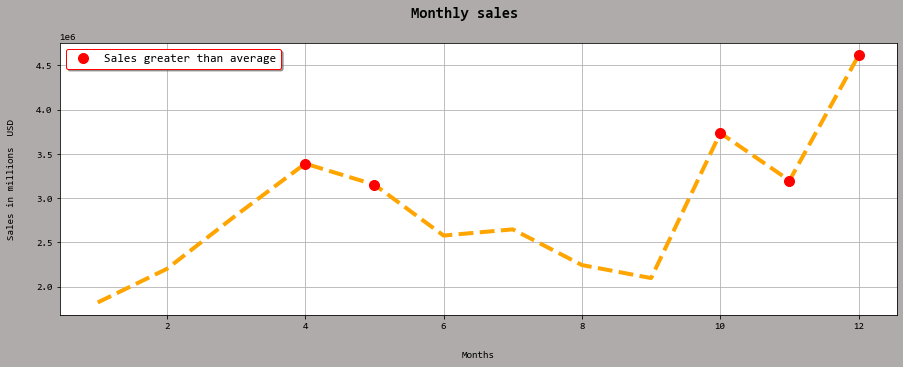

In [223]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(results.index,results['Sales'], lw=4, color='orange', linestyle='--')
ax.plot(results['Sales'][mask].index,results['Sales'][mask], 'ro', ms='10', label='Sales greater than average')
ax.legend(fontsize=12, shadow=True,labelcolor='black', edgecolor='r')

plt.suptitle('Monthly sales', fontweight='bold', fontsize=15) 
ax.set_xlabel('Months', labelpad=20)
ax.set_ylabel('Sales in millions  USD', labelpad=20)
ax.grid()

### Question 2: What city had the highest number of sales?

In [162]:
all_data.columns = all_data.columns.str.replace(' ','_')
all_data.Purchase_Address[:5]

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: Purchase_Address, dtype: object

In [160]:
all_data['City'] = all_data.Purchase_Address.apply(lambda x : x.split(', ')[-2])
all_data['City'].value_counts()

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [209]:
city_results = all_data.groupby('City')['Sales'].sum()
city_results.sort_values(ascending=False).index.to_list()

['San Francisco',
 'Los Angeles',
 'New York City',
 'Boston',
 'Atlanta',
 'Dallas',
 'Seattle',
 'Portland',
 'Austin']

In [219]:
city_results.sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

Text(0.5, 0, 'Sales in millions USD')

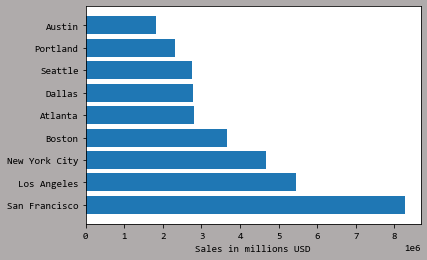

In [222]:
fig, ax = plt.subplots()

cities = city_results.sort_values(ascending=False).index.to_list()
y = np.arange(len(cities))
sales = city_results.sort_values(ascending=False).values

ax.barh(cities, sales, align='center')
ax.set_xlabel('Sales in millions USD')

In [246]:
sample_address = '917 1st St, Dallas, TX 75001'

### Question 2.1: What if we have duplicated city names? How can we handle it?

In [247]:
def get_city(address):
    return address.split(', ')[-2]
get_city(sample_address)

'Dallas'

In [248]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
get_state(sample_address)

'TX'

In [237]:
all_data['City']= all_data['Purchase_Address'].apply(lambda x : f'{get_city(x)} ({get_state(x)})')
all_data.groupby('City')['Sales'].sum().sort_values(ascending=False).values

array([8262203.91, 5452570.8 , 4664317.43, 3661642.01, 2795498.58,
       2767975.4 , 2747755.48, 1870732.34, 1819581.75,  449758.27])

Text(0.5, 0, 'Sales in millions USD')

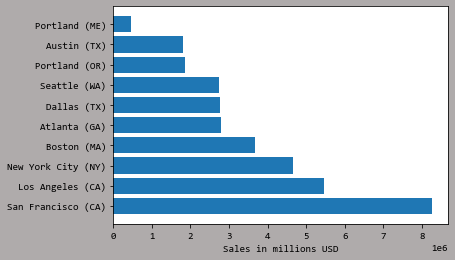

In [240]:
fig, ax=plt.subplots()

cities = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False).index.to_list()
y = np.arange(len(cities))
sales = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False).values

ax.barh(cities, sales, align='center')
ax.set_xlabel('Sales in millions USD')

In [63]:
all_data.groupby("City").sum()['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

In [68]:
cities=all_data['City'].unique()
cities

array([' Dallas (TX)', ' Boston (MA)', ' Los Angeles (CA)',
       ' San Francisco (CA)', ' Seattle (WA)', ' Atlanta (GA)',
       ' New York City (NY)', ' Portland (OR)', ' Austin (TX)',
       ' Portland (ME)'], dtype=object)

Text(0.5, 0, 'City')

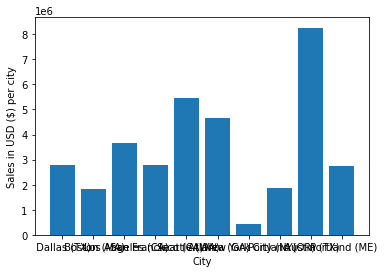

In [69]:
plt.bar(cities,city_sales['Sales'])
plt.xticks(cities)
plt.ylabel('Sales in USD ($) per city')
plt.xlabel ("City")

Text(0.5, 0, 'City')

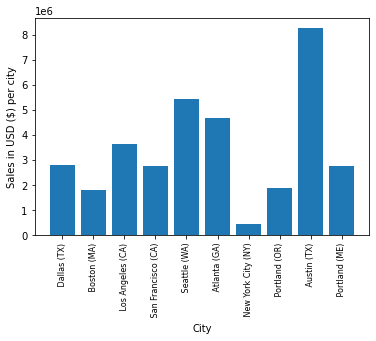

In [70]:
# rotation attribute in order to see the ticks of x axis
plt.bar(cities,city_sales['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($) per city')
plt.xlabel ("City")

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [258]:
all_data['Order_Date']=pd.to_datetime(all_data['Order_Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 17.5+ MB


In [261]:
all_data['Hour']=all_data['Order_Date'].dt.hour
all_data['Minute']=all_data['Order_Date'].dt.minute
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [262]:
# Prepare de x axis of the plt
hours=[hour for hour, df in all_data.groupby('Hour')]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [263]:
#Prepare y axis of plot
all_data.groupby('Hour').count()
# this shows how many rows (orders of sales) there are for each hour

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


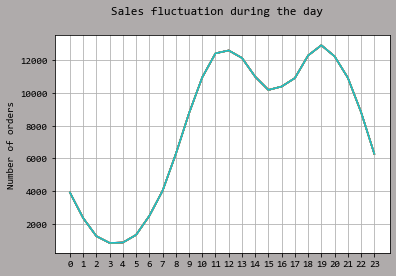

In [275]:
fig, ax = plt.subplots()
plt.plot(hours, all_data.groupby('Hour').count())# count number of rows of each hour
plt.grid()
plt.xticks(hours)
ax.set_ylabel("Number of orders")
fig.suptitle('Sales fluctuation during the day')
plt.show()

In [274]:
# recomendation of advertisement before the two daily peaks that  happend around 11am and 7pm

### Question 4: what products are most often sold together?

In [278]:
all_data.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco (CA),13,3
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle (WA),7,46
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta (GA),10,58
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco (CA),10,38
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston (MA),14,5


In [279]:
# .duplicated()
df=all_data[all_data['Order_ID'].duplicated(keep=False)] # False: Mark all duplicates as True.
df.head(15)            

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [280]:
df['Grouped']=df.groupby('Order_ID')['Product'].transform(lambda x: " , ".join(x))

C:\Users\BIRDPE~1\AppData\Local\Temp/ipykernel_7040/2443277769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order_ID')['Product'].transform(lambda x: " , ".join(x))


In [88]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone , Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone , Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone , USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone , USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones , Bose SoundSport H..."


In [282]:
# drop duplicated appareances
df=df[['Order_ID','Grouped']].drop_duplicates(keep='first')# keeps first appearance of duplicated value
df.head()

,Order_ID,Grouped
3,176560,"Google Phone , Wired Headphones"
18,176574,"Google Phone , USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
32,176586,"AAA Batteries (4-pack) , Google Phone"
119,176672,"Lightning Charging Cable , USB-C Charging Cable"


**Now that we have the pairs of products sold together, we have to count them. We'll use a couple of new libraries**

In [285]:
from itertools import combinations
from collections import Counter

# we need a counter 
count=Counter()
# then we can actually count the pair combinations in a sublist. In order to do it,
# we have to check the content of each row of the column Grouped in the dataframe 
for row in df['Grouped']:
    row_list=row.split(',') # then we split it because they are comma separated values
    # then we update de count variable defined above based on the row_list and the number we want of elements in the sublist
    # in this case 2 because we want pairs
    count.update(Counter(combinations(row_list,2)))# 2 because we are countin in pairs, 3 if we wanted counted in groups of 3
print(count)

Counter({('iPhone ', ' Lightning Charging Cable'): 886, ('Google Phone ', ' USB-C Charging Cable'): 859, ('iPhone ', ' Wired Headphones'): 443, ('Google Phone ', ' Wired Headphones'): 405, ('iPhone ', ' Apple Airpods Headphones'): 329, ('Vareebadd Phone ', ' USB-C Charging Cable'): 312, ('Google Phone ', ' Bose SoundSport Headphones'): 192, ('Vareebadd Phone ', ' Wired Headphones'): 140, ('Google Phone ', ' USB-C Charging Cable '): 128, ('iPhone ', ' Lightning Charging Cable '): 119, (' USB-C Charging Cable ', ' Wired Headphones'): 114, ('Vareebadd Phone ', ' Bose SoundSport Headphones'): 74, (' Lightning Charging Cable ', ' Wired Headphones'): 59, ('Lightning Charging Cable ', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable ', ' AA Batteries (4-pack)'): 52, ('Lightning Charging Cable ', ' Lightning Charging Cable'): 51, ('AA Batteries (4-pack) ', ' Lightning Charging Cable'): 51, ('AAA Batteries (4-pack) ', ' USB-C Charging Cable'): 50, ('Vareebadd Phone ', ' USB-C Charging C

In [286]:
count.most_common(10)

[(('iPhone ', ' Lightning Charging Cable'), 886),
 (('Google Phone ', ' USB-C Charging Cable'), 859),
 (('iPhone ', ' Wired Headphones'), 443),
 (('Google Phone ', ' Wired Headphones'), 405),
 (('iPhone ', ' Apple Airpods Headphones'), 329),
 (('Vareebadd Phone ', ' USB-C Charging Cable'), 312),
 (('Google Phone ', ' Bose SoundSport Headphones'), 192),
 (('Vareebadd Phone ', ' Wired Headphones'), 140),
 (('Google Phone ', ' USB-C Charging Cable '), 128),
 (('iPhone ', ' Lightning Charging Cable '), 119)]

In [287]:
for key,value in count.most_common(10):
    print (key,value)

('iPhone ', ' Lightning Charging Cable') 886
('Google Phone ', ' USB-C Charging Cable') 859
('iPhone ', ' Wired Headphones') 443
('Google Phone ', ' Wired Headphones') 405
('iPhone ', ' Apple Airpods Headphones') 329
('Vareebadd Phone ', ' USB-C Charging Cable') 312
('Google Phone ', ' Bose SoundSport Headphones') 192
('Vareebadd Phone ', ' Wired Headphones') 140
('Google Phone ', ' USB-C Charging Cable ') 128
('iPhone ', ' Lightning Charging Cable ') 119


### Question 5: what product sold the most? 


In [289]:
quantity_grouped=all_data.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending=False)
quantity=all_data.groupby('Product')['Quantity_Ordered'].sum()
quantity_grouped

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity_Ordered, dtype: float64

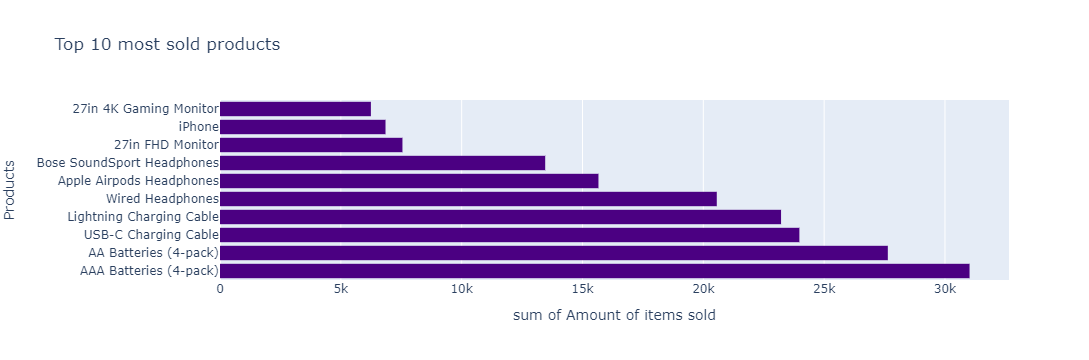

In [323]:
fig = px.histogram(quantity_grouped, y= quantity_grouped.index[:10], x = quantity_grouped.values[:10],  
                   labels=dict(y="Products", x="Amount of items sold"),
                   orientation='h',  title='Top 10 most sold products', color_discrete_sequence = ['Indigo'])

fig.update_layout(bargap=0.2)

Other way to do the same thing:

In [290]:
product_group=all_data.groupby('Product')
product_group.sum()

,Quantity_Ordered,Price_Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129.0,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244.0,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199.0,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819.0,1440000.00,34224,1445700.00,68815,142789


In [301]:
quantity_ordered=product_group.sum()['Quantity_Ordered']
quantity_ordered

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity_Ordered, dtype: float64

#### In order to figure out if there is a correlation between prices and amount sold, we could overlay the prices onto the plot

In [340]:
prices=all_data.groupby('Product').mean()['Price_Each']
prices.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price_Each, dtype: float64

C:\Users\BIRDPE~1\AppData\Local\Temp/ipykernel_7040/3850197810.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



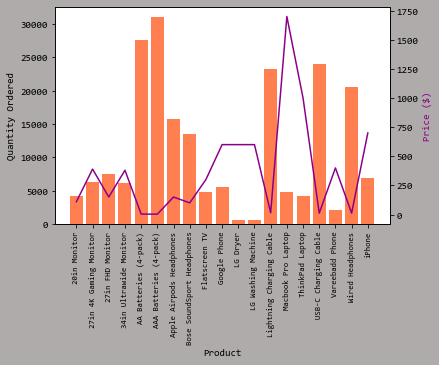

In [337]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='coral')
ax2.plot(products, prices, 'darkmagenta')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)', color='darkmagenta')
ax1.set_xticklabels(products, rotation="vertical",size=8)

plt.show()